Import

In [1]:
#%%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# permet d'afficher toute les colonne d'un head
pd.set_option('max_columns', None)

# permet d'afficher toute les ligne d'un head
#pd.set_option('max_rows', None)

# Reset de l'affichage des colonnes et ligne
# pd.reset_option('max_columns')
pd.reset_option('max_rows')

# Besoin calorique selon google 2000 a 2200 pour une femme et 2400 a 2700 pour un homme j'ai pris 2500
Besoin_calorique = 2500 * 365


Population

In [2]:
# J'importe mon fichier csv
df_population = pd.read_csv("data\population.csv")
#Je défini le nom de mes colonnes qui était a la base : 'Zone' 'Année' 'Valeur'
df_population.rename(columns={'Zone' : 'Pays',
                              'Année': 'Année',
                              'Valeur' : 'Population',
},inplace=True)

#Je rename mes colonne pour quelle soit pareille dans tous mes fichier
df_population['Pays'] = df_population['Pays'].replace(['Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord','Tchéquie (la)'],['Royaume-Uni','Tchéquie']) 


# Je convertis en millions et je passe la colonne en int
df_population['Population'] = df_population['Population'] * 1000
df_population['Population'] = df_population['Population'].astype(int)
# Change tout les valeur na NaN en 0
df_population.fillna(0, inplace=True)

Sous nutrition

In [3]:
# Je crée ma variable avec mon tableau ou le nom de mes colonne sont a l'interieur
sn_columns = ['Zone','Année','Valeur']
# J'importe mon fichier csv et j'y ajoute les colonne a importer
df_sous_nutrition = pd.read_csv("data\sous_nutrition.csv")[sn_columns]
# J'utilise la fonction pandas .rename pour changer le nom de mes colonnes, histoire de découvrire d'autre fonction
df_sous_nutrition.rename(
    columns={
        'Zone' : 'Pays',
        'Année' : 'Année',
        'Valeur' : 'sous_nutrition'
    }, inplace=True
)
df_sous_nutrition['Pays'] = df_sous_nutrition['Pays'].replace(['Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord','Tchéquie (la)'],['Royaume-Uni','Tchéquie']) 

def format_annee(annee):            # Je definie une fonction pour laquelle je vais chercher l'année pour la mettre au bon format.
    if annee == '2011-2013':        # exemple trouver sur google : def get_capital(country)        
        return 2012                 #                                   if country == 'India':
    elif annee == '2012-2014':      #                                   return 'New Delhi'
        return 2013
    elif annee == '2013-2015':
        return 2014
    elif annee == '2014-2016':
        return 2015
    elif annee == '2015-2017':
        return 2016
    elif annee == '2016-2018':
        return 2017
    
# Ici j'applique ma fonction sur la colonne année
df_sous_nutrition['Année'] = df_sous_nutrition['Année'].apply(format_annee)
# Je passe la colonne sous_nutrition en integer
df_sous_nutrition['sous_nutrition'] = pd.to_numeric(df_sous_nutrition['sous_nutrition'], errors='coerce' ,downcast='integer')
df_sous_nutrition.fillna(0,inplace=True)

# Je multiplie jusqu'au millions et je rapplique le format int sur ma colonne qui aprés ce calcul est passé en float
df_sous_nutrition['sous_nutrition'] = df_sous_nutrition['sous_nutrition'] * 1000000
df_sous_nutrition['sous_nutrition'] = df_sous_nutrition['sous_nutrition'].astype(int)
# Je crée ma colonne en_sous_nutrition et j'applique l'état false 
df_sous_nutrition['en_sous_nutrition'] = False
# Grace a la fonction pandas .loc je choisi toute mes valeur dans sous_nutrition qui sont > 0 et j'applique sur les lignes de ma colonne en_sous_nutrition true si c'est le cas.
df_sous_nutrition.loc[df_sous_nutrition['sous_nutrition'] > 0, 'en_sous_nutrition'] = True

df_sous_nutrition.head()

,Pays,Année,sous_nutrition,en_sous_nutrition
0,Afghanistan,2013.0,8600000,True
1,Afghanistan,2014.0,8800000,True
2,Afghanistan,2015.0,8900000,True
3,Afghanistan,2016.0,9700000,True
4,Afghanistan,2017.0,10500000,True


Proportion de la population en sous nutrition en 2017

In [4]:
# Je merge via pandas mes data frame population et sous nutrition ou le pays et l'année sont égale dans les 2 df
df_pop_sn = pd.merge(df_population, df_sous_nutrition, on=['Pays','Année'], how='left')
df_pop_sn.fillna(0,inplace=True)
# Je restreint ma dataframe a l'année 2017
df_pop_sn = df_pop_sn.loc[df_pop_sn['Année'] == 2017, ['Pays', 'Année', 'Population', 'sous_nutrition']]

# Je fais .copy() pour pouvoir reutiliser ma dataframe
df_total_sn = df_pop_sn.copy()
df_total_sn.fillna(0,inplace=True)
# ici je fait la somme totale de la colonne sous nutrition et je repasse la colonne en int
df_total_sn = df_total_sn['sous_nutrition'].sum()
df_total_sn = df_total_sn.astype(int)

df_total_pop = df_pop_sn.copy() 
df_total_pop.fillna(0, inplace=True)
# ici je fait la somme totale de la colonne population et je repasse la colonne en int
df_total_pop = df_pop_sn['Population'].sum()
# Je calcule la proportion de la population par somme totale sous nutrition / somme totale population
df_prop_pop = df_total_sn / df_total_pop
# Dans mon print j'utilise Formatted string literals 
print(f"Population en sous nutrition en 2017 : {df_total_sn:,} ({df_prop_pop:.3%})")
df_pop_sn.head()


Population en sous nutrition en 2017 : 535,700,000 (7.097%)


,Pays,Année,Population,sous_nutrition
4,Afghanistan,2017,36296113,10500000.0
10,Afrique du Sud,2017,57009756,3100000.0
16,Albanie,2017,2884169,100000.0
22,Algérie,2017,41389189,1300000.0
28,Allemagne,2017,82658409,0.0


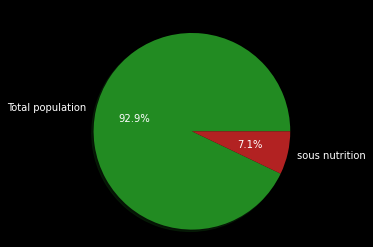

In [5]:
labels = 'Total population', 'sous nutrition'
sizes = [df_total_pop - df_total_sn, df_total_sn]
colors = ['forestgreen', 'firebrick', 'royalblue']
plt.style.use("dark_background")
plt.title(' ')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
# plt.savefig('sousnutrition.png', dpi=300, transparent=True)
plt.show()

In [6]:
df_aide = pd.read_csv('data\aide_alimentaire.csv')
df_aide.rename(columns={
    'Pays bénéficiaire' : 'Pays',
    'Année' : 'Année',
    'Produit' : 'Produit aide',
    'Valeur' : 'Valeur aide'},
inplace=True)


df_aide.head()

,Pays,Année,Produit aide,Valeur aide
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


Disponibilité totale mondiale et Personne pouvant etre nourrit

In [7]:
df_dispo_alim = pd.read_csv('data\dispo_alimentaire.csv')

# je garde ici les nom des colonnes au cas ou je dois les re-utiliser plus tard
df_dispo_alim.rename(columns={'Zone' : 'Pays',
            #    'Produit',
            #    'Origine',
            #  'Aliments pour animaux',
            #    'Autres Utilisations',
            #   'Disponibilité alimentaire (Kcal/personne/jour)',
            #   'Disponibilité alimentaire en quantité (kg/personne/an)',
            #    'Disponibilité de matière grasse en quantité (g/personne/jour)',
            #   'Disponibilité de protéines en quantité (g/personne/jour)',
            #    'Disponibilité intérieure',
            #    'Exportations - Quantité',
            #    'Importations - Quantité',
            #    'Nourriture',
            #    'Pertes',
            #    'Production',
            #    'Semences',
            #    'Traitement',
            #    'Variation de stock'
              }, inplace=True)

# J'ai crée cette dataframe pour mon for plus bas 
df_for_col = ['Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité intérieure','Aliments pour animaux', 'Autres Utilisations','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes',
         'Production','Semences','Traitement','Variation de stock']

df_for_drop_col = ['Disponibilité alimentaire en quantité (kg/personne/an)','Aliments pour animaux', 'Autres Utilisations','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes', 'Production','Semences','Traitement','Variation de stock']

df_dispo_alim['Pays'] = df_dispo_alim['Pays'].replace(['Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord','Tchéquie (la)'],['Royaume-Uni','Tchéquie']) 


Dispo_alim = df_dispo_alim.copy()

# Je fais une copy de population sous nutrition qui lui filtre les informations de 2017
Pop_sn_copy = df_pop_sn.copy()

Dispo_alim = pd.merge(Dispo_alim, Pop_sn_copy, on=['Pays'], how='left')
Dispo_alim.fillna(0, inplace=True) 

# pour chaque colonne dans ma df j'update la colonne en integer avec pandas car le int64 normal n'affiche pas les nombre en entier sur vscode
for col in [df_for_col,'Année','Population','sous_nutrition']:
    Dispo_alim[col] = Dispo_alim[col].astype(np.int64)

# nouvelle colonne pour la dispo alim total calcul
Dispo_alim['dispo_alim_total'] = Dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] * Dispo_alim['Population'] * 365
# Donc la je change en int mais avec la fonction np.int64 puisque sinon aprés mon calcul la colonne passe en int32 qui n'affiche pas la totalité des chiffres
Dispo_alim['dispo_alim_total'] = Dispo_alim['dispo_alim_total'].astype(np.int64)
Dispo_alim.fillna(0, inplace=True)

# Ici je fait la somme dispo alimentaire total que je divise par le besoin calorique qui est de 2500 kcal
df_result_pers_nour = Dispo_alim['dispo_alim_total'].sum() / Besoin_calorique
df_result_pers_nour = df_result_pers_nour.astype(np.int64)

print(f"Disponibilité total mondial : {Dispo_alim['dispo_alim_total'].sum():,} \nPersonne pouvant etre nourrit : {df_result_pers_nour:,}")

Disponibilité total mondial : 7,731,489,394,689,605 
Personne pouvant etre nourrit : 8,472,865,090


Disponibilité alimentaire végétale

In [8]:
df_veg = Dispo_alim.copy()
# j'utilise .drop pour virer toute les ligne de ma colonne égale a animale pour garder seulement les végataux
df_veg.drop(df_veg[df_veg['Origine'] == 'animale'].index,inplace=True)
df_veg['Dispo_veg_total'] = df_veg['Disponibilité alimentaire (Kcal/personne/jour)'] * df_veg['Population'] * 365
df_veg['Dispo_veg_total'] = df_veg['Dispo_veg_total'].astype(np.int64)
df_veg_result = df_veg['Dispo_veg_total'].sum() / Besoin_calorique
df_veg_result = df_veg_result.astype(np.int64)
print(f"Disponibilité alimentaire végétale : {df_veg_result:,}")


Disponibilité alimentaire végétale : 6,979,803,760


Disponibilité alimentaire animal

In [9]:
df_animal = Dispo_alim.copy()
# j'utilise .drop pour virer toute les ligne de ma colonne égale a végétale pour garder seulement les animaux
df_animal.drop(df_animal[df_animal['Origine'] == 'vegetale'].index,inplace=True)
df_animal['Dispo_animal_total'] = df_animal['Disponibilité alimentaire (Kcal/personne/jour)'] * df_animal['Population'] * 365
df_animal['Dispo_animal_total'] = df_animal['Dispo_animal_total'].astype(np.int64)
df_animal_result = df_animal['Dispo_animal_total'].sum() / Besoin_calorique
df_animal_result = df_animal_result.astype(np.int64)
# ici en plus de mon resultat je vérifie bien que la somme de mes resultats dispo animal et végatal soit égale au nombre total mondiale
print(f"Disponibilité alimentaire animal : {df_animal_result:,} \nVerification que le total des 2 dataframe soit équal au nombre total mondiale :  {df_animal_result+df_veg_result+1:,}/{df_result_pers_nour:,}")


Disponibilité alimentaire animal : 1,493,061,329 
Verification que le total des 2 dataframe soit équal au nombre total mondiale :  8,472,865,090/8,472,865,090


Disponibilité intérieur


Référencement pour le calcul de la disponibilité intérieur https://www.fao.org/3/x9892f/x9892f03.htm#:~:text=(b)%20Production%20%2B%20importations%20%2B%20variations%20des%20stocks%20(baisse%20ou%20augmentation)%20%3D%20quantit%C3%A9s%20disponibles%20pour%20l%27exportation%20et%20l%27utilisation%20int%C3%A9rieure.

In [10]:
df_di_result_animal = Dispo_alim.copy()
df_di_result_animal['Dispo inter animal'] = df_di_result_animal['Production'] +  df_di_result_animal['Importations - Quantité'] - df_di_result_animal['Exportations - Quantité'] + df_di_result_animal['Variation de stock'] - df_di_result_animal['Autres Utilisations'] - df_di_result_animal['Nourriture'] - df_di_result_animal['Pertes'] - df_di_result_animal['Traitement']
#  Aliments pour animaux Autres Utilisations Nourriture Pertes Traitement
df_di_result_animal = df_di_result_animal.loc[df_di_result_animal['Dispo inter animal'] > 0,]
df_di_result_animal = df_di_result_animal['Dispo inter animal'].sum()
print(f"Disponibilité intérieur pour l'alimentation animale : {df_di_result_animal:,}")

Disponibilité intérieur pour l'alimentation animale : 1,460,079


In [11]:
df_di_result_lost = Dispo_alim.copy()
df_di_result_lost['Dispo inter lost'] = df_di_result_lost['Production'] +  df_di_result_lost['Importations - Quantité'] - df_di_result_lost['Exportations - Quantité'] + df_di_result_lost['Variation de stock'] - df_di_result_lost['Autres Utilisations'] - df_di_result_lost['Nourriture'] - df_di_result_lost['Aliments pour animaux'] - df_di_result_lost['Traitement']
#  Aliments pour animaux Autres Utilisations Nourriture Pertes Traitement
df_di_result_lost = df_di_result_lost.loc[df_di_result_lost['Dispo inter lost'] > 0,]
df_di_result_lost = df_di_result_lost['Dispo inter lost'].sum()
print(f"Perte total d'alimentation : {df_di_result_lost:,}")

Perte total d'alimentation : 608,396


In [12]:
df_di_result_food = Dispo_alim.copy()
df_di_result_food['Dispo inter food'] = df_di_result_food['Production'] +  df_di_result_food['Importations - Quantité'] - df_di_result_food['Exportations - Quantité'] + df_di_result_food['Variation de stock'] - df_di_result_food['Autres Utilisations'] - df_di_result_food['Pertes'] - df_di_result_food['Aliments pour animaux'] - df_di_result_food['Traitement']
#  Aliments pour animaux Autres Utilisations Nourriture Pertes Traitement
df_di_result_food = df_di_result_food.loc[df_di_result_food['Dispo inter food'] > 0,]
df_di_result_food = df_di_result_food['Dispo inter food'].sum()
print(f"Disponibilité intérieur pour l'alimentation humaine : {df_di_result_food:,}")

Disponibilité intérieur pour l'alimentation humaine : 5,028,478


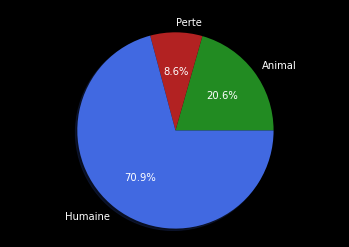

In [13]:
labels = 'Animal', 'Perte', 'Humaine'
sizes = [df_di_result_animal, df_di_result_lost, df_di_result_food]
colors = ['forestgreen', 'firebrick', 'royalblue']
plt.style.use("dark_background")
plt.title(' ')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
# plt.savefig('Dispo_nourrish.png', dpi=300, transparent=True)
plt.show()

Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

Haïti       0.48%

In [14]:
df_prop_sa = Dispo_alim.copy()
# Je créé la colonne proportion_sn pour y mettre mon resultat
df_prop_sa['proportion_sn'] = df_prop_sa['sous_nutrition'] / df_prop_sa['Population']  
df_prop_sa.fillna(0, inplace=True)
# Je groupe par pays
df_prop_sa = df_prop_sa.groupby(['Pays']).mean()
df_prop_sa.reset_index(inplace=True)
# Je tri par proportion_sn
df_prop_sa.sort_values(by='proportion_sn',ascending=False, inplace=True)
# df_prop_sa = df_prop_sa.loc[df_prop_sa['proportion_sn'] > 0, ['Pays']]
# J'arrondi mon nombre
df_prop_sa['proportion_sn'] =  round(df_prop_sa['proportion_sn'], 2)
df_prop_sa =  df_prop_sa[['Pays', 'proportion_sn']]
df_prop_sa.head(10)



,Pays,proportion_sn
65,Haïti,0.48
133,République populaire démocratique de Corée,0.47
91,Madagascar,0.41
87,Libéria,0.38
84,Lesotho,0.38
151,Tchad,0.38
127,Rwanda,0.35
103,Mozambique,0.33
154,Timor-Leste,0.32
0,Afghanistan,0.29


Bénéficiaire d’aide depuis 2013

République arabe syrienne en 2014 avec 48 919 d'aide


In [15]:
df_from_2k13 = df_aide.copy()
#Je groupe les resultat par pays
df_from_2k13 = df_from_2k13.groupby(['Pays']).mean()
df_from_2k13['Année'] = df_from_2k13['Année'].astype(np.int64)
# Je fait un sort values pour trier sur la colonne valeur aide du plus grand au plus petit
df_from_2k13.sort_values(by='Valeur aide',ascending=False, inplace=True)
df_from_2k13['Valeur aide'] = df_from_2k13['Valeur aide'].astype(np.int64)

df_from_2k13.head(10)

,Année,Valeur aide
Pays,,
République arabe syrienne,2014,48919
Éthiopie,2013,41857
Yémen,2014,31749
Soudan du Sud,2014,31602
Soudan,2013,27907
Kenya,2013,20475
Bangladesh,2013,13927
Pakistan,2013,12161
Afghanistan,2013,11590


Disponibilité/Habitant

In [16]:
df_dispo_par_pop = Dispo_alim.copy()
# J'ai drop les colonnes que je ne voulais plus voir et dont je n'ai pas besoin
df_dispo_par_pop = df_dispo_par_pop.drop(['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Exportations - Quantité', 'Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock','Année','sous_nutrition','dispo_alim_total'], axis=1)
df_dispo_par_pop = df_dispo_par_pop.groupby(['Pays']).mean()
df_dispo_par_pop['Dispo inter par habitant'] = df_dispo_par_pop['Disponibilité intérieure'] / df_dispo_par_pop['Population']
df_dispo_par_pop['Disponibilité intérieure'] = df_dispo_par_pop['Disponibilité intérieure'].astype(np.int64)
df_dispo_par_pop['Population'] = df_dispo_par_pop['Population'].astype(np.int64)
df_dispo_par_pop.sort_values(by='Dispo inter par habitant',ascending=False, inplace=True)
df_dispo_par_pop.head(10)

,Disponibilité intérieure,Population,Dispo inter par habitant
Pays,,,
Eswatini,71,1124805,0.000063
Brésil,10763,207833823,0.000052
Guyana,36,775222,0.000048
Belize,17,375769,0.000046
Maurice,52,1264499,0.000041
Danemark,212,5732274,0.000037
Bélarus,302,9450231,0.000032
Fidji,26,877459,0.000031
Vanuatu,8,285510,0.000030


La thailande à Produit 30 228 de manioc en export 25 214 et en import 1 250. 

La population en sous nutrition étant 6 200 000.



Sans exporter le manioc la thailande pourrais nourrir 22 812 personne supplémentaire

In [17]:
df_thai = Dispo_alim.copy()
df_thai = df_thai.loc[df_thai['Pays'] == 'Thaïlande']
df_thai = df_thai.loc[df_thai['Produit'] == 'Manioc']
df_thai_imp = df_thai['Importations - Quantité'] 
df_thai_ex = df_thai['Exportations - Quantité']
df_thai_ma = df_thai['Production'] + df_thai_imp 
df_thai_cal = df_thai['Production'] - df_thai['Nourriture'] - df_thai['Pertes'] - df_thai['Exportations - Quantité'] -df_thai['Autres Utilisations'] - df_thai['Aliments pour animaux'] + df_thai_imp
df_thai_sn = 2500 / df_thai['Disponibilité alimentaire (Kcal/personne/jour)'] * 365
print(df_thai_sn)
df_thai.head()
#31 477

13809    22812.5
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64


,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,sous_nutrition,dispo_alim_total
13809,Thaïlande,Manioc,vegetale,1800,2081,40.0,13,0.05,0.14,6264,25214,1250,871,1511,30228,0,0,0,2017,69209810,6200000,1010463226000


Utilisation des céréales, répartition entre l’alimentation humaine et animale

In [ ]:
df_cereale = pd.read_csv('data\FAOSTAT_data_2-11-2022.csv')
df_cereale.head()
df_c = df_cereale.copy()
df_c_dispo = df_c.loc[df_c['Élément'] == 'Disponibilité intérieure']
df_result_dispo = df_c_dispo['Valeur'].sum()
print(df_result_dispo)

3460389


Total céréale Humain

In [ ]:
df_c_humain = df_c.loc[df_c['Élément'] == 'Nourriture']
df_Total_pays_humain = df_c_humain['Valeur'].sum()
df_result_cereal_humain = df_Total_pays_humain / df_result_dispo
print(f"Resultat céréale humain par rapport a la dispo inter : {df_result_cereal_humain:.1%}")
print(f"Total répartition céréal pour consomation humaine dans tout les pays en 2017 : {df_Total_pays_humain:,}")

Resultat céréale humain par rapport a la dispo inter : 46.3%
Total répartition céréal pour consomation humaine dans tout les pays en 2017 : 1,601,534


In [ ]:
df_c_humain2 = df_c_humain.copy()
df_c_humain2 = df_c_humain2.groupby(['Zone']).mean()
df_c_humain2['Valeur'] = round(df_c_humain2['Valeur'], 2)
df_c_humain2.head()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
Zone,,,,,,
Afghanistan,2.0,5142.0,2547.888889,2017.0,2017.0,749.56
Afrique du Sud,202.0,5142.0,2547.888889,2017.0,2017.0,1113.78
Albanie,3.0,5142.0,2556.571429,2017.0,2017.0,59.71
Algérie,4.0,5142.0,2551.750000,2017.0,2017.0,1044.88
Allemagne,79.0,5142.0,2551.625000,2017.0,2017.0,1181.38


Total céréal Animaux

In [ ]:
df_c_animal = df_c.loc[df_c['Élément'] == 'Aliments pour animaux']
df_Total_pays_animals = df_c_animal['Valeur'].sum() 
df_result_cereal_animal = df_Total_pays_animals / df_result_dispo
print(f"Resultat céréale animaux par rapport a la dispo inter: {df_result_cereal_animal:.1%}")
print(f"Total répartition céréal pour consomation animale dans tout les pays en 2017 : {df_Total_pays_animals:,}")

Resultat céréale animaux par rapport a la dispo inter: 33.4%
Total répartition céréal pour consomation animale dans tout les pays en 2017 : 1,155,057


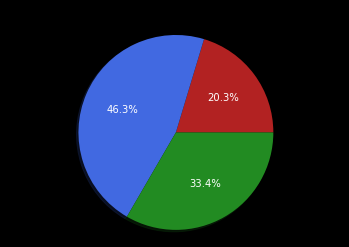

In [ ]:
labels = 'interieur', 'humain', 'aniaml'
sizes = [df_result_dispo - (df_Total_pays_humain + df_Total_pays_animals), df_Total_pays_humain, df_Total_pays_animals]
colors = ['firebrick','royalblue', 'forestgreen']
plt.style.use("dark_background")
plt.title(' ')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
# plt.savefig('Dispo_int_anim_hum.png', dpi=300, transparent=True)
plt.show()